# EDA & Predictions in Fish Species

Dataset: [link](https://www.kaggle.com/aungpyaeap/fish-market?rvi=1)

## 1. Importing modules and dataset

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
import numpy as np 

import warnings
warnings.filterwarnings('ignore')
sns.set_style('dark')

In [2]:
df = pd.read_csv('/kaggle/input/fish-market/Fish.csv')

## 2. General overview of the Data

In [3]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


There are 159 row and 7 columns. All data is float64 except of the species

In [5]:
df.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

There are no null values

In [6]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


## 3. Find Correlation and Outliers

### 3.1 Heatmap

In [7]:
correlation = df.corr()

<AxesSubplot:>

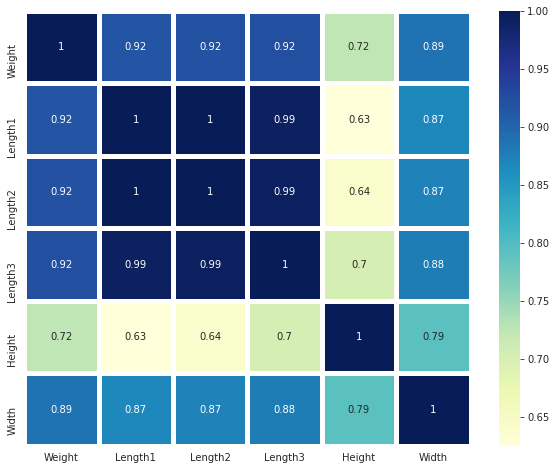

In [8]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation, annot=True, linecolor='white', linewidth=5, cmap="YlGnBu")

From the correlation we can see that length has greal correlation with each other.

Also weight has correlation more than 90% with the length

### 3.1 Boxplot

<AxesSubplot:>

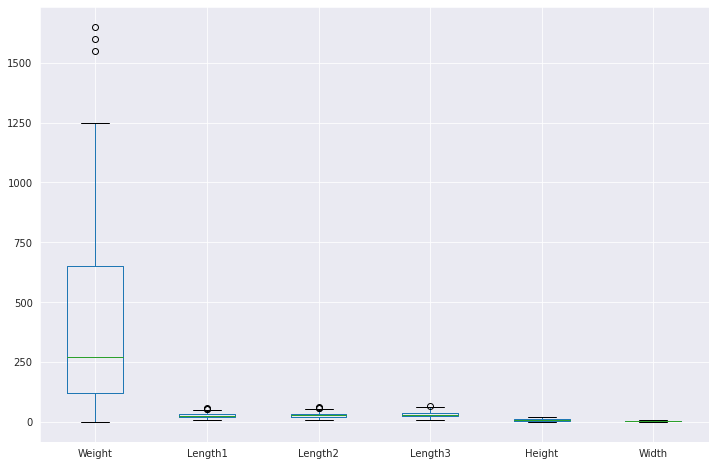

In [9]:
df.boxplot(figsize=(12,8))

On the outlier view, there is three outlier of weight that has great affect of the data. 

The value is more than 1500, it makes the data unbalanced

In [10]:
# Display the outlier
df[df['Weight'] > 1500]

,Species,Weight,Length1,Length2,Length3,Height,Width
142,Pike,1600.0,56.0,60.0,64.0,9.600,6.144
143,Pike,1550.0,56.0,60.0,64.0,9.600,6.144
144,Pike,1650.0,59.0,63.4,68.0,10.812,7.480


Because there are three outliers, let's drop it

In [11]:
# Choosing all invert value of outliers as df
df = df[~(df['Weight'] > 1500)]

<AxesSubplot:>

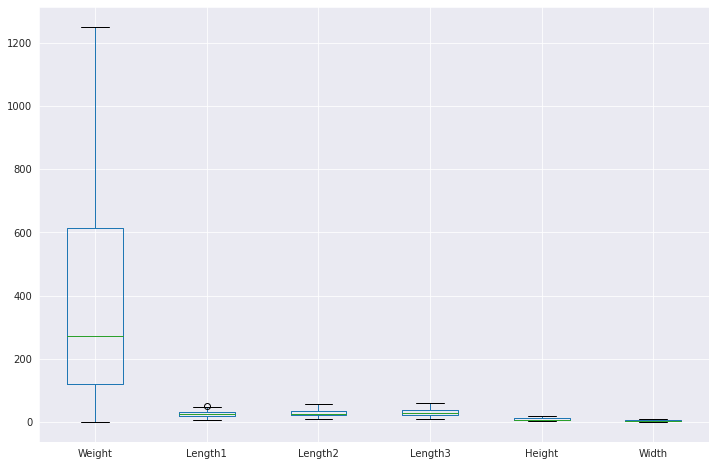

In [12]:
df.boxplot(figsize=(12,8))

As you can see, the weight data is better, but in the length1, there is one dot that tell it as an outlier. Let's check it out

<AxesSubplot:>

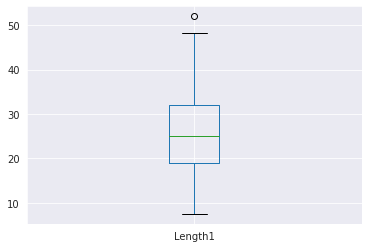

In [13]:
df.boxplot(column='Length1')

Let's look into the outlier

In [14]:
df[(df['Length1'] > 50)]

,Species,Weight,Length1,Length2,Length3,Height,Width
141,Pike,1250.0,52.0,56.0,59.7,10.6863,6.9849


Let's also drop the outlier

In [15]:
df = df[~(df['Length1'] > 50)]

<AxesSubplot:>

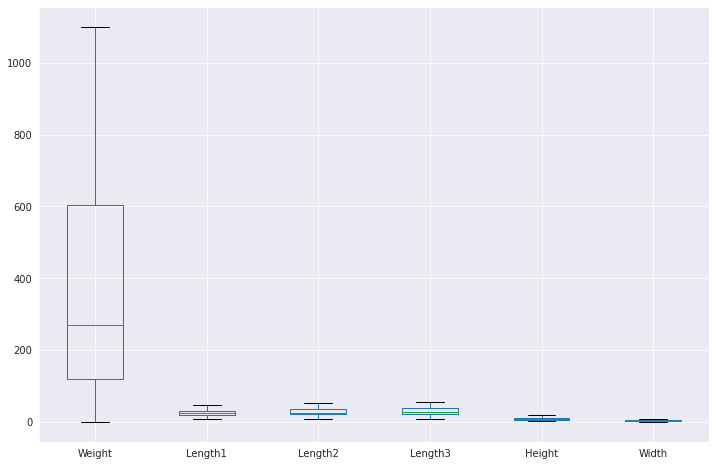

In [16]:
df.boxplot(figsize=(12,8))

Well, it's better right now, altough the median of Weight is not good enough, let's skip it and go to next steps

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  155 non-null    object 
 1   Weight   155 non-null    float64
 2   Length1  155 non-null    float64
 3   Length2  155 non-null    float64
 4   Length3  155 non-null    float64
 5   Height   155 non-null    float64
 6   Width    155 non-null    float64
dtypes: float64(6), object(1)
memory usage: 9.7+ KB


Well, our data has 155 row right now

### 3.1 Pairplot

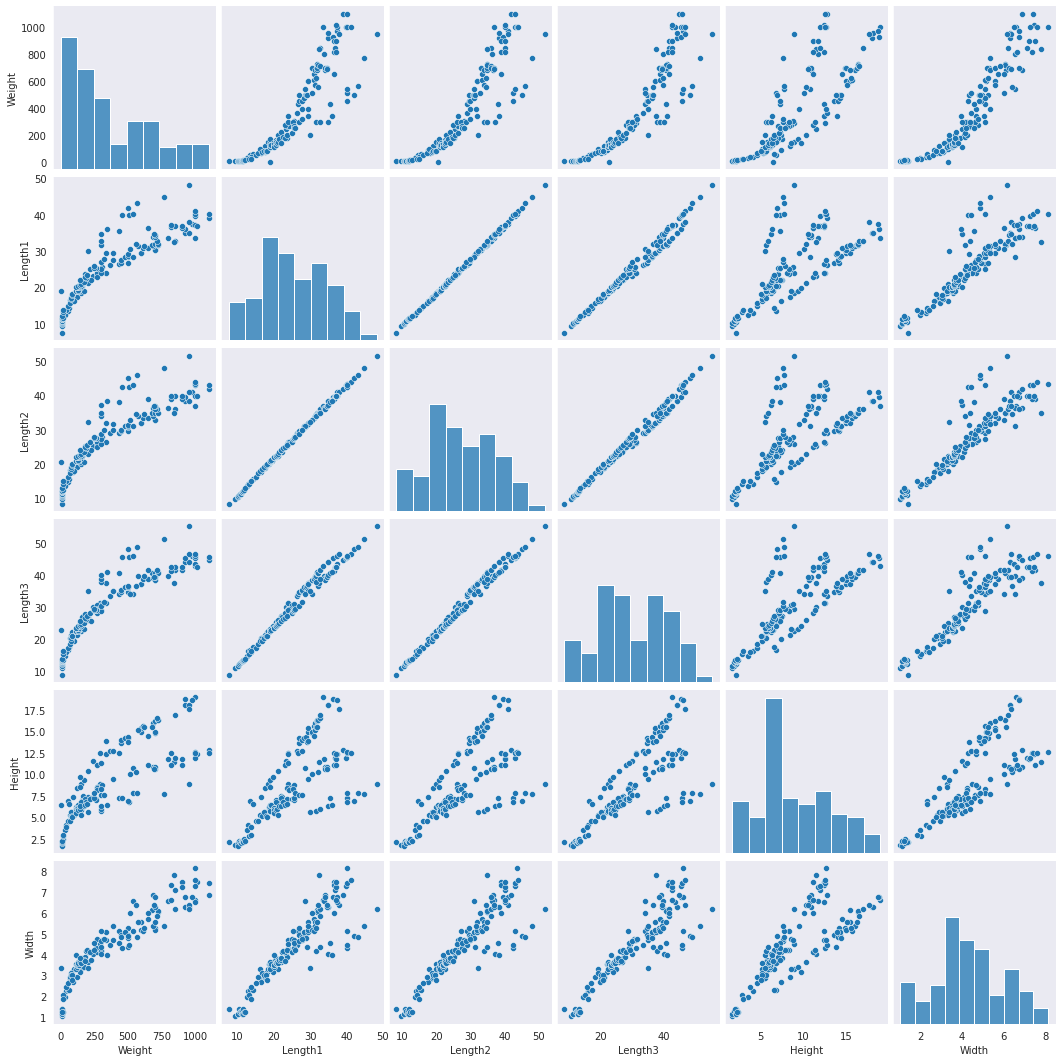

In [18]:
sns.pairplot(df)

Intersting, the weight and height value is not balance yet, but, let's try to skip this

## 4. Analyze the data based on species

### 4.1 Get general visualization of the species

In [19]:
# Get the value of each fish

df['Species'].value_counts()

Perch        56
Bream        35
Roach        20
Smelt        14
Pike         13
Parkki       11
Whitefish     6
Name: Species, dtype: int64

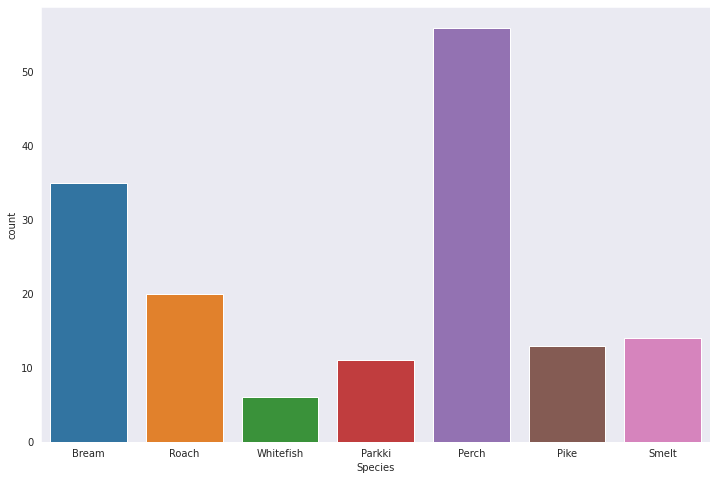

In [20]:
plt.figure(figsize=(12,8))
sns.countplot(df['Species'])
plt.show()

From the graph, we know that the population of Perch is the most common, and the whitefish is the rarest species

### 4.2 Pairplot the species

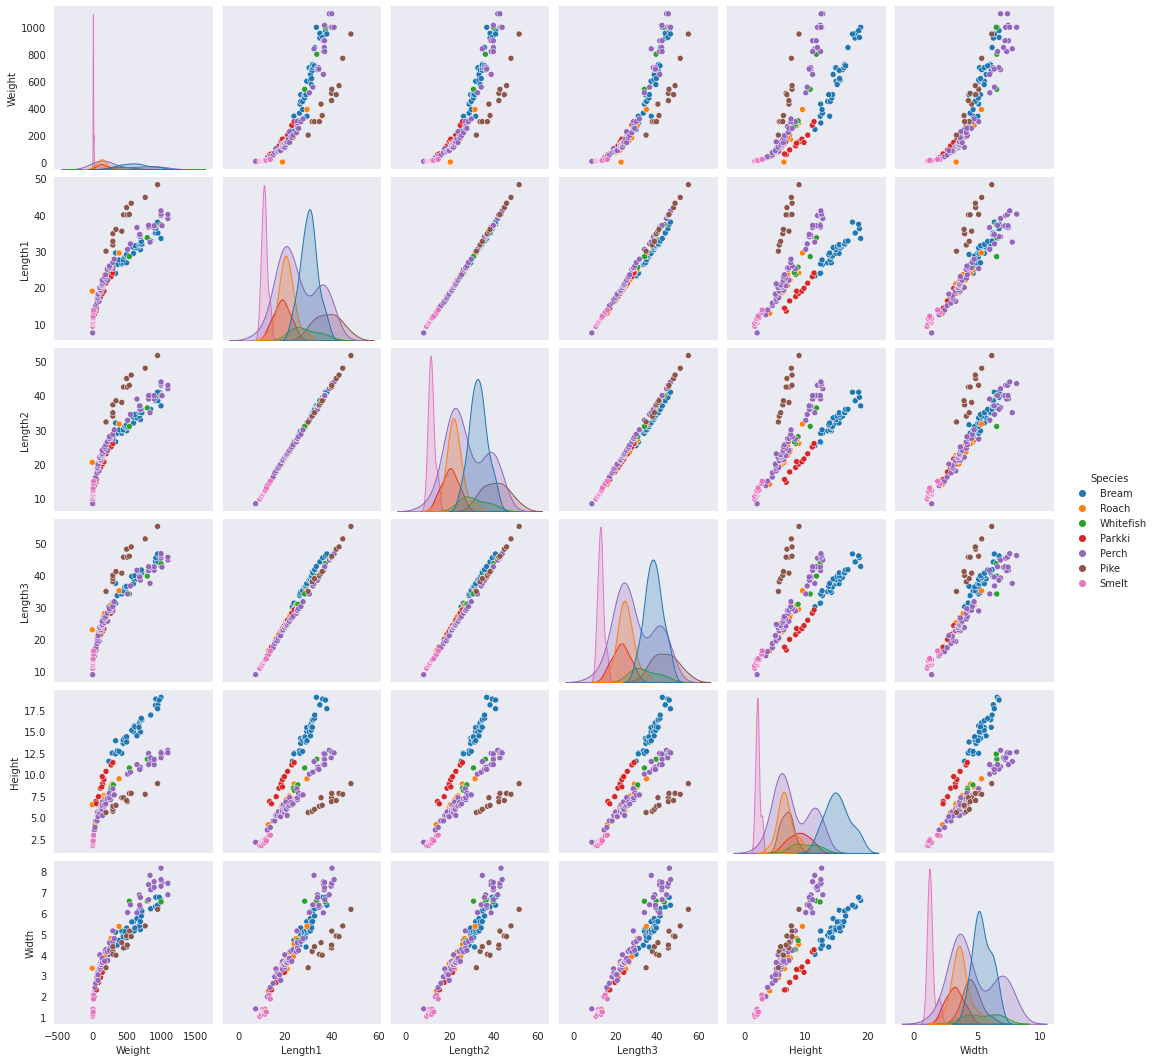

In [21]:
sns.pairplot(df, hue='Species')

Interesting, the smelt is the most unique

### 4.2 Boxplot of species based on weight

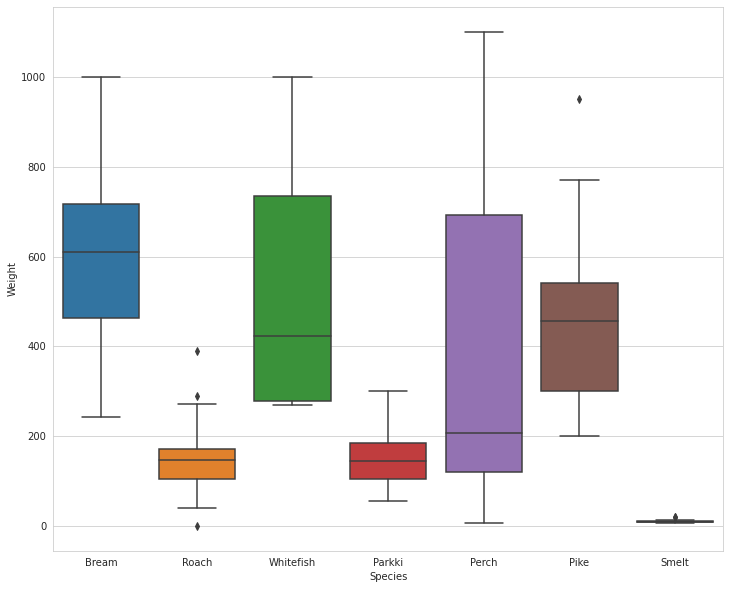

In [22]:
plt.figure(figsize=(12,10))
sns.set_style("whitegrid")
sns.boxplot(x='Species', y='Weight', data=df)
plt.show()

There are a few more outliers that we got, I think we should drop it

To make sure let make boxplot each of the species that has outliers

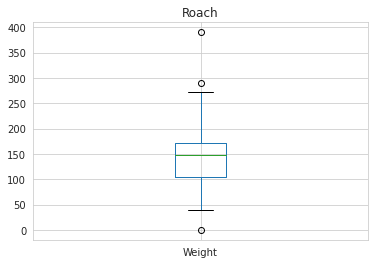

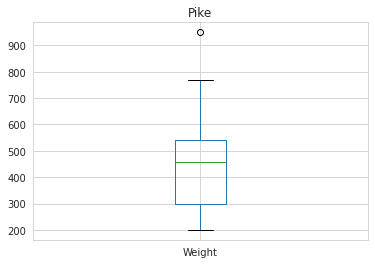

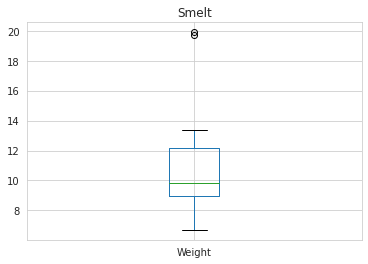

In [23]:
outlier_species = ['Roach', 'Pike', 'Smelt']

for species in outlier_species:
    plt.title(species)
    df[(df.Species == species)].boxplot("Weight")
    plt.show()

Okay, let's drop the outliers again.

But, to make it easier I want to change the Species as the index

### 4.3 Removing the outliers

Sorry, in this time I was still newbie, So, I will remove manually the outlier using this syntax

In [24]:
# Get all index of Roach above 275
(df[(df.Species == 'Roach')].Weight > 275)

35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
50    False
51    False
52     True
53    False
54     True
Name: Weight, dtype: bool

In [25]:
# The first outlier is exist in index 52 and 54, let's drop it
df.drop(52, inplace=True)
df.drop(54, inplace=True)

In [26]:
# Get all index of Roach below 30
(df[(df.Species == 'Roach')].Weight < 30)

35    False
36    False
37    False
38    False
39    False
40     True
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
50    False
51    False
53    False
Name: Weight, dtype: bool

In [27]:
# Remove the index of 40
df.drop(40, inplace=True)

In [28]:
# Get all index of Pike above 800
(df[(df.Species == 'Pike')].Weight > 800)

128    False
129    False
130    False
131    False
132    False
133    False
134    False
135    False
136    False
137    False
138    False
139    False
140     True
Name: Weight, dtype: bool

In [29]:
# Remove the index of 140
df.drop(140, inplace=True)

In [30]:
# Get all index of Smelt above 15
(df[(df.Species == 'Smelt')].Weight > 15)

145    False
146    False
147    False
148    False
149    False
150    False
151    False
152    False
153    False
154    False
155    False
156    False
157     True
158     True
Name: Weight, dtype: bool

In [31]:
# Remove the index of 153 and 154
df.drop(153, inplace=True)
df.drop(154, inplace=True)

### 4.4 Check again the boxplot

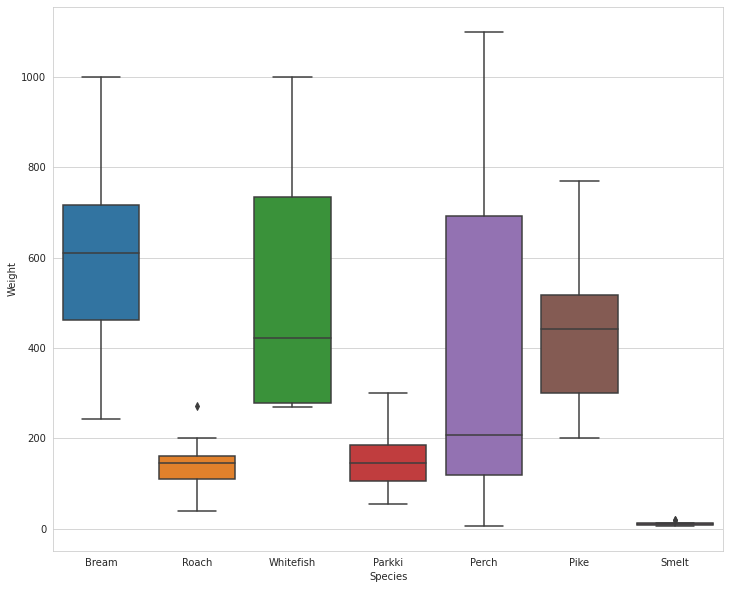

In [32]:
plt.figure(figsize=(12,10))
sns.set_style("whitegrid")
sns.boxplot(x='Species', y='Weight', data=df)
plt.show()

Well, we got new outlier here, let's clean it

In [33]:
df[(df.Species == 'Roach')].Weight > 200

35    False
36    False
37    False
38    False
39    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
50    False
51    False
53     True
Name: Weight, dtype: bool

In [34]:
df.drop(53, inplace=True)

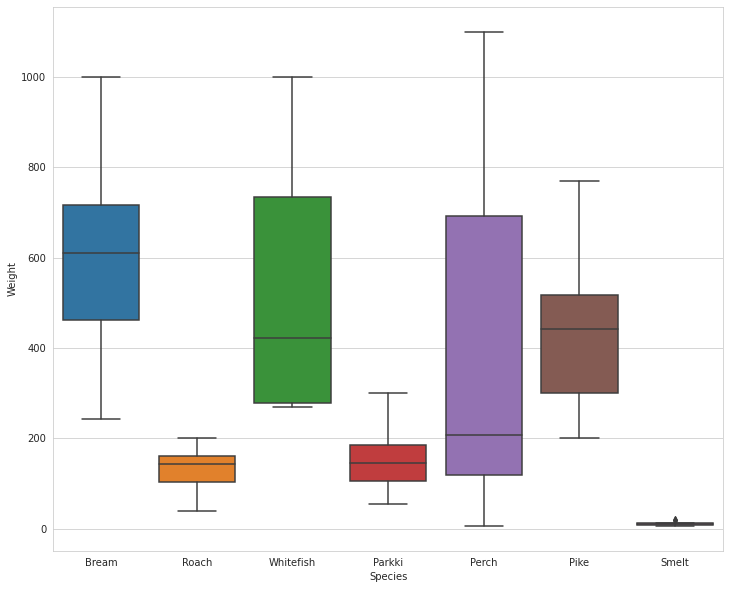

In [35]:
plt.figure(figsize=(12,10))
sns.set_style("whitegrid")
sns.boxplot(x='Species', y='Weight', data=df)
plt.show()

Okay, everything is fine, let's make a model for predictions

## 5. Predictions

I want to make predictions, the reference I used is from [Amartya Nambiar](https://www.kaggle.com/amartyanambiar)

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### 5.1 Model Preparations

In [37]:
# Converting species into categorical data
df_fish = pd.get_dummies(df,columns=['Species'])

In [38]:
df_fish

,Weight,Length1,Length2,Length3,Height,Width,Species_Bream,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,242.0,23.2,25.4,30.0,11.5200,4.0200,1,0,0,0,0,0,0
1,290.0,24.0,26.3,31.2,12.4800,4.3056,1,0,0,0,0,0,0
2,340.0,23.9,26.5,31.1,12.3778,4.6961,1,0,0,0,0,0,0
3,363.0,26.3,29.0,33.5,12.7300,4.4555,1,0,0,0,0,0,0
4,430.0,26.5,29.0,34.0,12.4440,5.1340,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,9.9,11.3,11.8,13.1,2.2139,1.1659,0,0,0,0,0,1,0
155,13.4,11.7,12.4,13.5,2.4300,1.2690,0,0,0,0,0,1,0
156,12.2,12.1,13.0,13.8,2.2770,1.2558,0,0,0,0,0,1,0
157,19.7,13.2,14.3,15.2,2.8728,2.0672,0,0,0,0,0,1,0


In [39]:
X = df_fish.iloc[:,1:13].values
y = df_fish['Weight'].values

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

In [41]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [42]:
lr_score =  lr_model.score(X_train,y_train)

In [43]:
print("Prediction score:", lr_score)

Prediction score: 0.9447731404403671


### 5.2 Predict the test data

In [44]:
preds = lr_model.predict(X_test)

In [45]:
pred_data = {"y_test":y_test, "pred":preds, "diff":abs(y_test - preds)}
pd.DataFrame(data=pred_data).head(10)

,y_test,pred,diff
0,80.0,73.676426,6.323574
1,720.0,712.468845,7.531155
2,500.0,517.640110,17.640110
3,300.0,262.618586,37.381414
4,160.0,179.068992,19.068992
5,690.0,696.163515,6.163515
6,456.0,492.435624,36.435624
7,270.0,334.303828,64.303828
8,925.0,915.246299,9.753701
9,430.0,457.433543,27.433543


### 5.3 Visualize the predictions

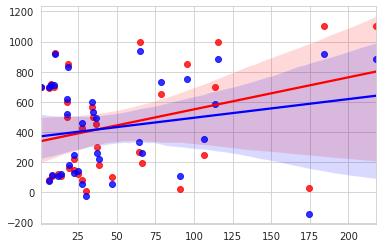

In [46]:
sns.regplot(x='diff', y='y_test', data=pred_data, color='r')
sns.regplot(x='diff', y='pred', data=pred_data, color='b')
plt.show()

## Well, thank you for read this, hope it can help anybody